<a href="https://colab.research.google.com/github/hemil19/AmExpert-2019-Machine-Learning-Hackathon/blob/master/Amexpert-2019-Machine-Learning-Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Coupon Redemption**

XYZ Credit Card company regularly helps it’s merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning. Can you wear the AmExpert hat and help out ABC?

 
Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.

 
ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

 
The data available in this problem contains the following information, including the details of a sample of campaigns and coupons used in previous campaigns -

User Demographic Details
Campaign and coupon Details
Product details
Previous transactions
Based on previous transaction & performance data from the last 18 campaigns, predict the probability for the next 10 campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?

 
Link to the competition: https://datahack.analyticsvidhya.com/contest/amexpert-2019-machine-learning-hackathon/

**Leaderboard Scores**

PUBLIC LB SCORE:   0.784271489893097

PRIVATE LB SCORE:  0.770984981485098



In [1]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test_QyjYwdj.csv')

In [ ]:
train.shape

(78369, 5)

In [ ]:
test.shape

(50226, 4)

In [ ]:
campaign_data=pd.read_csv('campaign_data.csv')
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [ ]:
train=pd.merge(train,campaign_data,how='left',on='campaign_id')
test=pd.merge(test,campaign_data,how='left',on='campaign_id')

In [ ]:
train.shape,test.shape

((78369, 8), (50226, 7))

In [ ]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


In [ ]:
customer_demographics=pd.read_csv('customer_demographics.csv')
customer_transaction_data=pd.read_csv('customer_transaction_data.csv')

In [ ]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [ ]:
customer_demographics.isna().sum()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [ ]:
customer_demographics['marital_status'].fillna(customer_demographics['marital_status'].mode()[0],inplace=True)
customer_demographics['no_of_children'].fillna(0,inplace=True)

In [ ]:
train=pd.merge(train,customer_demographics,on='customer_id',how='left')
test=pd.merge(test,customer_demographics,on='customer_id',how='left')

In [ ]:
train.shape,test.shape

((78369, 14), (50226, 13))

In [ ]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Married,0.0,1,0,5.0
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,0,3.0
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,0,7.0
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,0,3.0


In [ ]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [ ]:
item_data=pd.read_csv('item_data.csv')
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [ ]:
customerdata=pd.merge(customer_transaction_data.groupby('item_id').agg({'quantity':'sum','selling_price':'mean','other_discount':'mean','coupon_discount':'mean'}).reset_index(),item_data,on='item_id',how='left')

In [ ]:
customerdata.shape

(74063, 8)

In [ ]:
customerdata.head()

,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,2,124.31,0.0,0.0,1,Established,Grocery
1,2,1,35.26,0.0,0.0,1,Established,Miscellaneous
2,3,1,56.64,0.0,0.0,56,Local,Bakery
3,4,1,54.85,0.0,0.0,56,Local,Grocery
4,5,1,81.57,0.0,0.0,56,Local,Grocery


In [ ]:
customerdata.head()

,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,2,124.31,0.0,0.0,1,Established,Grocery
1,2,1,35.26,0.0,0.0,1,Established,Miscellaneous
2,3,1,56.64,0.0,0.0,56,Local,Bakery
3,4,1,54.85,0.0,0.0,56,Local,Grocery
4,5,1,81.57,0.0,0.0,56,Local,Grocery


In [ ]:
coupon_item_mapping=pd.read_csv('coupon_item_mapping.csv')
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [ ]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Married,0.0,1,0,5.0
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,0,3.0
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,0,7.0
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,0,3.0


In [ ]:
train.shape

(78369, 14)

In [ ]:
dict={}
for i in range(0,len(coupon_item_mapping['coupon_id'])):
  dict[coupon_item_mapping['coupon_id'][i]]=coupon_item_mapping['item_id'][i]

In [ ]:
ids=[]
for i in range(0,len(train)):
  ids.append(dict[train['coupon_id'][i]])

In [ ]:
len(ids)==len(train)

True

In [ ]:
id_test=[]
for i in range(0,len(test)):
  id_test.append(dict[test['coupon_id'][i]])

In [ ]:
len(id_test)==len(test)

True

In [ ]:
train['item_id']=ids
test['item_id']=id_test

In [ ]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Married,0.0,1,0,5.0,3051
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,0,3.0,4157
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,0,7.0,71612
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,12342
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,0,3.0,27619


In [ ]:
train.shape,test.shape

((78369, 15), (50226, 14))

In [ ]:
customerdata.head()

,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,2,124.31,0.0,0.0,1,Established,Grocery
1,2,1,35.26,0.0,0.0,1,Established,Miscellaneous
2,3,1,56.64,0.0,0.0,56,Local,Bakery
3,4,1,54.85,0.0,0.0,56,Local,Grocery
4,5,1,81.57,0.0,0.0,56,Local,Grocery


In [ ]:
train=pd.merge(train,customerdata,on='item_id',how='left')
test=pd.merge(test,customerdata,on='item_id',how='left')

In [ ]:
train.shape,test.shape

((78369, 22), (50226, 21))

In [ ]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,46-55,Married,0.0,1,0,5.0,3051,1,89.050000,-42.390000,0.000000,1636,Established,Grocery
1,2,13,116,48,0,X,19/05/13,05/07/13,36-45,Married,0.0,2,0,3.0,4157,1,53.430000,-10.330000,0.000000,56,Local,Grocery
2,6,9,635,205,0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,0,7.0,71612,1,427.080000,0.000000,0.000000,560,Established,Pharmaceutical
3,7,13,644,1050,0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,12342,27,105.922273,-11.674545,0.000000,611,Established,Grocery
4,9,8,1017,1489,0,X,16/02/13,05/04/13,46-55,Married,0.0,2,0,3.0,27619,113,187.336505,-35.844272,-0.172913,1558,Established,Grocery


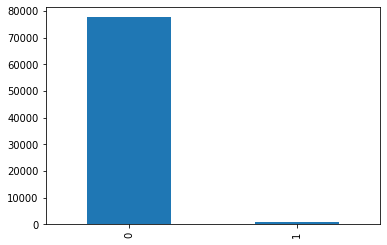

In [ ]:
train['redemption_status'].value_counts().plot(kind='bar')

In [ ]:
train.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
campaign_type            0
start_date               0
end_date                 0
age_range            34708
marital_status       34708
rented               34708
family_size          34708
no_of_children       34708
income_bracket       34708
item_id                  0
quantity                 0
selling_price            0
other_discount           0
coupon_discount          0
brand                    0
brand_type               0
category                 0
dtype: int64

In [ ]:
test.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
campaign_type          0
start_date             0
end_date               0
age_range          19287
marital_status     19287
rented             19287
family_size        19287
no_of_children     19287
income_bracket     19287
item_id                0
quantity               0
selling_price          0
other_discount         0
coupon_discount        0
brand                  0
brand_type             0
category               0
dtype: int64

In [ ]:
combine=train.append(test)
combine.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0.0,X,19/05/13,05/07/13,46-55,Married,0.0,1,0,5.0,3051,1,89.050000,-42.390000,0.000000,1636,Established,Grocery
1,2,13,116,48,0.0,X,19/05/13,05/07/13,36-45,Married,0.0,2,0,3.0,4157,1,53.430000,-10.330000,0.000000,56,Local,Grocery
2,6,9,635,205,0.0,Y,11/03/13,12/04/13,46-55,Married,0.0,2,0,7.0,71612,1,427.080000,0.000000,0.000000,560,Established,Pharmaceutical
3,7,13,644,1050,0.0,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,12342,27,105.922273,-11.674545,0.000000,611,Established,Grocery
4,9,8,1017,1489,0.0,X,16/02/13,05/04/13,46-55,Married,0.0,2,0,3.0,27619,113,187.336505,-35.844272,-0.172913,1558,Established,Grocery


In [ ]:
combine['income_bracket'].dtypes

dtype('float64')

In [ ]:
combine['age_range'].fillna(combine['age_range'].mode()[0],inplace=True)

In [ ]:
combine['marital_status'].fillna(combine['marital_status'].mode()[0],inplace=True)

In [ ]:
combine['rented'].fillna(0.056461,inplace=True)

In [ ]:
combine['family_size'].fillna(combine['family_size'].mode()[0],inplace=True)

In [ ]:
combine['no_of_children'].fillna(combine['no_of_children'].mode()[0],inplace=True)

In [ ]:
combine['income_bracket'].fillna(combine['income_bracket'].mean(),inplace=True)

In [ ]:
combine.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status    50226
campaign_type            0
start_date               0
end_date                 0
age_range                0
marital_status           0
rented                   0
family_size              0
no_of_children           0
income_bracket           0
item_id                  0
quantity                 0
selling_price            0
other_discount           0
coupon_discount          0
brand                    0
brand_type               0
category                 0
dtype: int64

In [ ]:
combine.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,1,13,27,1053,0.0,X,19/05/13,05/07/13,46-55,Married,0.000000,1,0,5.000000,3051,1,89.050000,-42.390000,0.000000,1636,Established,Grocery
1,2,13,116,48,0.0,X,19/05/13,05/07/13,36-45,Married,0.000000,2,0,3.000000,4157,1,53.430000,-10.330000,0.000000,56,Local,Grocery
2,6,9,635,205,0.0,Y,11/03/13,12/04/13,46-55,Married,0.000000,2,0,7.000000,71612,1,427.080000,0.000000,0.000000,560,Established,Pharmaceutical
3,7,13,644,1050,0.0,X,19/05/13,05/07/13,46-55,Married,0.056461,2,0,4.843539,12342,27,105.922273,-11.674545,0.000000,611,Established,Grocery
4,9,8,1017,1489,0.0,X,16/02/13,05/04/13,46-55,Married,0.000000,2,0,3.000000,27619,113,187.336505,-35.844272,-0.172913,1558,Established,Grocery


In [ ]:
combine.dtypes

id                     int64
campaign_id            int64
coupon_id              int64
customer_id            int64
redemption_status    float64
campaign_type         object
start_date            object
end_date              object
age_range             object
marital_status        object
rented               float64
family_size           object
no_of_children        object
income_bracket       float64
item_id                int64
quantity               int64
selling_price        float64
other_discount       float64
coupon_discount      float64
brand                  int64
brand_type            object
category              object
dtype: object

In [ ]:
combine['family_size']=combine['family_size'].replace('5+','5')

In [ ]:
combine['no_of_children']=combine['no_of_children'].replace('3+','3')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
combine['age_range']=le.fit_transform(combine['age_range'])
combine['marital_status']=le.fit_transform(combine['marital_status'])
combine['family_size']=combine['family_size'].astype(int)
combine['no_of_children']=combine['no_of_children'].astype(int)
combine['brand_type']=le.fit_transform(combine['brand_type'])
combine['category']=le.fit_transform(combine['category'])

In [ ]:
combine['start_date']=pd.to_datetime(combine['start_date'])
combine['end_date']=pd.to_datetime(combine['end_date'])

In [ ]:
combine['no_of_days']=(combine['end_date']-combine['start_date']).dt.days

In [ ]:
combine['campaign_type']=le.fit_transform(combine['campaign_type'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
combine['selling_price']=sc.fit_transform(np.array(combine['selling_price']).reshape(-1,1))
combine['brand']=sc.fit_transform(np.array(combine['brand']).reshape(-1,1))

In [ ]:
combine.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,no_of_days
0,1,13,27,1053,0.0,0,2013-05-19,2013-05-07,3,0,0.000000,1,0,5.000000,3051,1,0.053764,-42.390000,0.000000,0.298609,0,3,-12
1,2,13,116,48,0.0,0,2013-05-19,2013-05-07,2,0,0.000000,2,0,3.000000,4157,1,0.028524,-10.330000,0.000000,0.009337,1,3,-12
2,6,9,635,205,0.0,1,2013-11-03,2013-12-04,3,0,0.000000,2,0,7.000000,71612,1,0.293287,0.000000,0.000000,0.101611,0,8,31
3,7,13,644,1050,0.0,0,2013-05-19,2013-05-07,3,0,0.056461,2,0,4.843539,12342,27,0.065719,-11.674545,0.000000,0.110948,0,3,-12
4,9,8,1017,1489,0.0,0,2013-02-16,2013-05-04,3,0,0.000000,2,0,3.000000,27619,113,0.123408,-35.844272,-0.172913,0.284328,0,3,77


In [ ]:
X = combine[combine['redemption_status'].isnull()!=True].drop(['id','campaign_id','coupon_id','customer_id','redemption_status','start_date','end_date','item_id','brand_type'], axis=1)
y = combine[combine['redemption_status'].isnull()!=True]['redemption_status']

test = combine[combine['redemption_status'].isnull()==True].drop(['id','campaign_id','coupon_id','customer_id','redemption_status','start_date','end_date','item_id','brand_type'], axis=1)

X.shape, y.shape, test.shape

((78369, 14), (78369,), (50226, 14))

In [ ]:
X.head()

,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,no_of_days
0,0,3,0,0.000000,1,0,5.000000,1,0.053764,-42.390000,0.000000,0.298609,0,3,-12
1,0,2,0,0.000000,2,0,3.000000,1,0.028524,-10.330000,0.000000,0.009337,1,3,-12
2,1,3,0,0.000000,2,0,7.000000,1,0.293287,0.000000,0.000000,0.101611,0,8,31
3,0,3,0,0.056461,2,0,4.843539,27,0.065719,-11.674545,0.000000,0.110948,0,3,-12
4,0,3,0,0.000000,2,0,3.000000,113,0.123408,-35.844272,-0.172913,0.284328,0,3,77


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(23)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(max_depth=5,
                       learning_rate=0.4, n_estimators=100)

model.fit(X_train,y_train,
          eval_set=[(X_train,y_train),(X_test, y_test.values)],
          eval_metric='auc',
          early_stopping_rounds=100,
          verbose=200)

pred_y = model.predict_proba(X_test)[:,1]
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
print(roc_auc_score(y_test, pred_y))
confusion_matrix(y_test, pred_y>0.5)

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[63]	training's binary_logloss: 0.042383	training's auc: 0.921867	valid_1's binary_logloss: 0.0475302	valid_1's auc: 0.813719
0.8138525567887148


array([[15544,     6],
       [  123,     1]])

In [ ]:
import plotly.express as px
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
fig = px.line(x=fpr, y=tpr, width=400, height=400,
              labels={'x':'False Positive Rates','y':'True Positive Rates'})
fig.show()

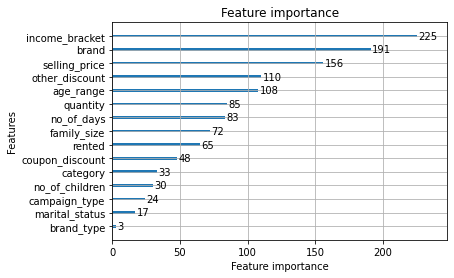

In [ ]:
import lightgbm
lightgbm.plot_importance(model)

In [ ]:
y_pred_tot_lgm = []

from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    pred_test = m.predict_proba(test)[:,1]
    i = i + 1
    y_pred_tot_lgm.append(pred_test)

Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.0362055	training's auc: 0.934273	valid_1's binary_logloss: 0.0435642	valid_1's auc: 0.846369
[400]	training's binary_logloss: 0.0321209	training's auc: 0.957626	valid_1's binary_logloss: 0.0436787	valid_1's auc: 0.851164
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0343435	training's auc: 0.946391	valid_1's binary_logloss: 0.0432257	valid_1's auc: 0.855556
err_lgm:  0.8555558622212409
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.0365852	training's auc: 0.931487	valid_1's binary_logloss: 0.044131	valid_1's auc: 0.844333
Early stopping, best iteration is:
[37]	training's binary_logloss: 0.0427302	training's auc: 0.889832	valid_1's binary_logloss: 0.0451336	valid_1's auc: 0.856439
err_lgm:  0.85643905939501
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.0364483	trai

In [ ]:
submission=pd.read_csv('/content/sample_submission.csv')
submission['redemption_status']=np.mean(y_pred_tot_lgm, 0)

In [ ]:
submission.head()

,id,redemption_status
0,3,0.024761
1,4,0.976362
2,5,0.008123
3,8,0.000427
4,10,0.000315


In [ ]:
submission.to_csv('amexpert_01.csv',index=False)